In [41]:
import random
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb
import pandas as pd
import numpy as np

## Prepare the dataset

In [2]:
df_titanic = pd.read_csv('../titanic.csv', sep=';')
df_titanic.dropna( axis =0 ,inplace=True)

In [3]:
df_titanic["Male"] = (df_titanic["Sex"] == "male") * 1
df_titanic["Female"] = (df_titanic["Sex"] == "female") * 1

In [4]:
X = df_titanic[["Age","Fare","Pclass","Male","Female"]] # ask yourself if the ID is meaningful or not (continuous, ordered values etc...)
Y = df_titanic["Survived"]

### Train-test split  
To correctly train the model you need to segment the OG data, train on segments,  
 and keep the test for final evaluation of the model

In [39]:
from sklearn.model_selection import train_test_split
# it has to been a joined split. we want to keep the X,Y relation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=532)
# random state guarantess that the test set doesn't move. Otherwise, the model will be overfitted.

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [6]:
model = LinearRegression() # !! LinearRegression is for prediction.

In [7]:
model = LogisticRegression() # !! For classification

In [8]:
model.fit(X_normalized,Y)
Y_pred = model.predict(X_normalized)

In [9]:
Y_pred # but here it only gives the above and below treshold score

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [10]:
# If we want to have the scores/values of the regression, we use LogisticalRegression
model.fit(X_normalized,Y)
Y_scores = model.predict_proba(X_normalized)
Y_score = Y_scores[:,1] # first arg is row, then column

In [11]:
Y_score # first is the score of being a '0', second is the score of being '1'. So gon' keep the second.
# the higher the score, the more probable that outcome. But it aint the same as a probability (that is calculated in pourcentage)
# a score is mapped on the Logistic Regression curve and is a good indicator of the possibility, but NOT an exact measure of probability.

array([0.93251109, 0.9381406 , 0.32533957, 0.92072189, 0.86855265,
       0.32773997, 0.54417732, 0.65818546, 0.90390209, 0.24775645,
       0.40388874, 0.90317316, 0.25496559, 0.96410534, 0.39166794,
       0.20722763, 0.59226631, 0.61153593, 0.3817613 , 0.61485538,
       0.89198403, 0.32928313, 0.96321162, 0.46799068, 0.58642183,
       0.31055207, 0.96036364, 0.27102275, 0.30685382, 0.89772683,
       0.61422178, 0.59515489, 0.91555073, 0.87790474, 0.9254231 ,
       0.43789521, 0.94797794, 0.94486727, 0.46567229, 0.93937081,
       0.41353226, 0.46789495, 0.82708009, 0.26315295, 0.9487831 ,
       0.34543949, 0.43252737, 0.87842794, 0.94143   , 0.46388874,
       0.85168662, 0.96479533, 0.31235528, 0.9811755 , 0.91103678,
       0.77119936, 0.96751365, 0.9477613 , 0.95805763, 0.9697258 ,
       0.94974138, 0.93085084, 0.93945245, 0.87948763, 0.96749596,
       0.39039071, 0.47681156, 0.54085145, 0.92854321, 0.39577892,
       0.6036331 , 0.96286319, 0.91768471, 0.96005141, 0.86435

In [12]:
Y_pred = Y_score > 0.5 # applying treshold. The higher the treshold, the more precision, the less recall.
Y_pred

array([ True,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

In [13]:
# in this case, to compare the error, I can compare Y & Y_pred
Y == Y_pred

1      True
3      True
6      True
10     True
11     True
       ... 
871    True
872    True
879    True
887    True
889    True
Name: Survived, Length: 183, dtype: bool

In [14]:
np.mean(Y == Y_pred) # this is accuracy, the number of correct predictions

0.7814207650273224

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(Y, Y_pred)

0.7814207650273224

In [17]:
from sklearn.metrics import precision_score

In [18]:
precision_score(Y, Y_pred) 

0.8487394957983193

In [19]:
((Y_pred == 1) & (Y == 1)).sum() / (Y_pred ==1).sum()

0.8487394957983193

In [20]:
from sklearn.metrics import recall_score

In [21]:
recall_score(Y, Y_pred) # Recall tells you how many times the model was able to detect a specific category

0.8211382113821138

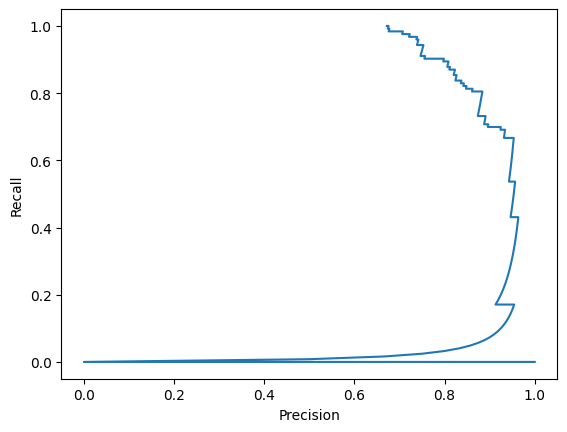

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(Y, Y_score) # it needs to score, because it wont be tresholded

fig = plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel('Recall')
plt.show()

### ROC Curve

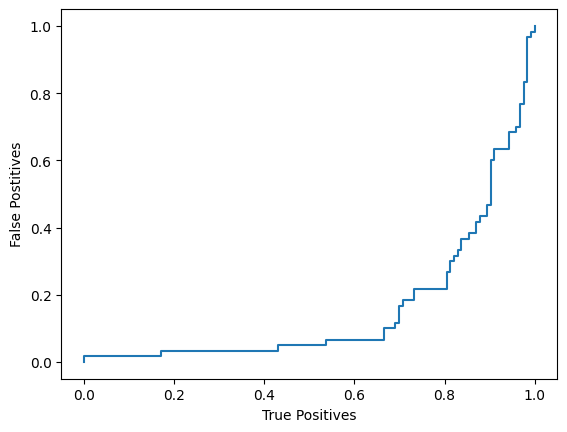

In [64]:
from sklearn.metrics import roc_curve #receiving operator curve

tp, fp, _ = roc_curve(Y, Y_score) # it needs to score, because it wont be tresholded

fig = plt.plot(fp, tp)
plt.xlabel("True Positives")
plt.ylabel("False Postitives")
display()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, Y_score)

0.8420054200542008

## Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
# you need to pass your model here because this function does: fit, predict, compute score & return
cv_results = cross_val_score(model, X_train, Y_train, cv=3, scoring='accuracy')
# scoring options =  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# cv = n° of folds. More folds = more noise beacuse smaller training data sets (folds), BUT a better view of the accuracy
cv_results

array([0.79069767, 0.76744186, 0.83333333])

**! Accuracy is not the best metric to define a model's quality, because the treshold is .5 !**  

Accuracy = Accuracy tells you how many times the ML model was correct overall.  
ROC = A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.  
AUC = Area Under Curve, the closer to 0.5 it is, the shittier the model.

In [58]:
cv_results = cross_val_score(model, X_train, Y_train, cv=3, scoring='roc_auc')
cv_results # this is NOT a percentage !

array([0.87037037, 0.74768519, 0.93269231])

In [65]:
print(f"The mean of the fold accuracy is {cv_results.mean()}, \n and the standard deviation is { cv_results.std()} \n for the first cross validation")
# this is a very simple method for the model, so a lot of nuances are lost.
# with Linear regression, models are often underfitted in regards to the previous remark.
# yet, it seems the model s rather well fitted.


The mean of the fold accuracy is 0.8502492877492877, 
 and the standard deviation is 0.07685723700027514 
 for the first cross validation


## Grid search

In [77]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV( model, { 'C' :[ .01, .1, 1, 10, 100] }, cv=3, scoring='roc_auc') 
# C is a hyperparameter that allows to regularize. The lower the value, the bigger the regularisation

In [78]:
grid_search_cv.fit(X_train, Y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [80]:
grid_search_cv.best_score_

0.8502492877492877

In [81]:
grid_search_cv.best_params_

{'C': 1}

___________________